In [1]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import regexp_tokenize
from nltk.stem.porter import PorterStemmer
import time
from scipy.sparse import csr_matrix

In [3]:
start_time = time.time()
train = pd.read_csv("input/train.tsv", sep='\t')
train = train[:1000]


In [4]:
def clean_missing(df):
    df["category_name"] = df["category_name"].replace(np.NaN, "")
    df["brand_name"] = df["brand_name"].replace(np.NaN, "")
    df["item_description"] = df["item_description"].replace(np.NaN, "")
    df["item_description"] = df["item_description"].replace(np.NaN, "")
    return df

start_time = time.time()
train = clean_missing(train)

print('[{}] Finished to replace NaN'.format(time.time() - start_time))


[0.07999992370605469] Finished to replace NaN


In [5]:
def split_cat(text):
    if text.count('/') > 1:
        return text.split("/")
    else:
        return (["No Label", "No Label", "No Label"])

def transform_category_name(df):
    df['general_cat'], df['subcat_1'], df['subcat_2'] = \
    zip(*df['category_name'].apply(lambda x: split_cat(x)))
    return df

start_time = time.time()
train = transform_category_name(train)

print('[{}] Finished to transform category_name'.format(time.time() - start_time))

[0.007999897003173828] Finished to transform category_name


In [6]:
stop_words = []
def stem_tokenize(text, stop_words=stop_words):
    stemmer = PorterStemmer()
    tokens = regexp_tokenize(text, pattern=r"[A-Za-z]\w+")
    tokens_wo_sw = [x for x in tokens if x not in stop_words and len(x) > 3]
    tokens_stemmed = [stemmer.stem(x) for x in tokens_wo_sw]
    return tokens_stemmed



In [76]:
item_description_tfidf_vectorizer = TfidfVectorizer(tokenizer=stem_tokenize, decode_error='ignore',
        strip_accents='unicode', max_df=0.7, min_df=0.004, ngram_range =(1,3))
X = item_description_tfidf_vectorizer.fit_transform(train["item_description"]).toarray()


In [77]:
X.shape

(1000, 970)

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(X)

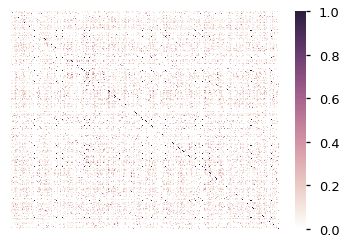

In [34]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(sims, xticklabels=False, yticklabels=False, cmap=cmap)
plt.show()

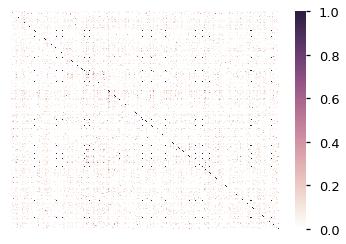

In [38]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(sims, xticklabels=False, yticklabels=False, cmap=cmap)
plt.show()

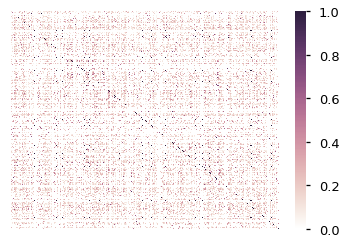

In [47]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(sims, xticklabels=False, yticklabels=False, cmap=cmap)
plt.show()

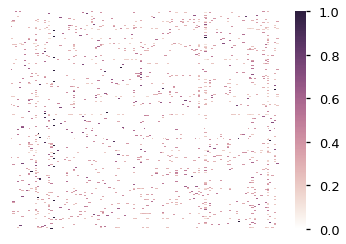

In [48]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(X, xticklabels=False, yticklabels=False, cmap=cmap)
plt.show()